<a href="https://colab.research.google.com/github/NishatVasker/Stress-management/blob/main/Stress_managment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload your zip file


Saving Stress-20241006T204141Z-001.zip to Stress-20241006T204141Z-001.zip


In [10]:
import zipfile
import os

# Assuming your uploaded zip file is named 'data.zip'
with zipfile.ZipFile('stress.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/data')  # Extract to a directory called 'data'

# List the extracted files
os.listdir('/content/data')


['Stress']

In [15]:
import zipfile
import os
import pandas as pd
import glob

# Assuming your uploaded zip file is named 'stress.zip'
# and it's in the current working directory
with zipfile.ZipFile('stress.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/data/Stress')  # Extract to a directory called 'data/Stress'

# List the extracted files to check if they were extracted correctly
print(os.listdir('/content/data/Stress'))

# Correct the glob pattern to look for CSV files in the 'Stress' directory
csv_files = glob.glob("/content/data/Stress/*.csv")  # Ensure the path ends with '/*.csv'

# Check if any CSV files were found
if csv_files:
    # Load each CSV file into a list of dataframes
    dataframes = [pd.read_csv(file) for file in csv_files]

    # Example: Show the first few rows of the first dataframe
    print(dataframes[0].head())
else:
    print("No CSV files found in /content/data/Stress")


['Sakib-274.csv', 'Sababa-229.csv', 'm.nabi-100.csv', 'Nipa-254.csv', 'shafkat-035.csv', 'nila-104.csv', 'sadruzzahan-147.csv', 'Raqibul-261.csv', 'Shaptashi-326.csv', 'afifa-174.csv', 'Tanweer-199.csv', 'Dip-307.csv', 'Malek-117.csv', 'jannatul-103.csv', 'zerin-282.csv', 'kotha-284.csv', 'Jubaiya-255.csv', 'Monia-170.csv', 'tania-017.csv', 'Tanvir-072.csv', 'Sumon-117.csv', 'syeda-315.csv', 'orni-144.csv', 'Stress', 'Toyabur-065.csv', 'israt-050.csv', 'Rifat-056.csv']


<ipython-input-15-4e01219465b8>:20: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = [pd.read_csv(file) for file in csv_files]
<ipython-input-15-4e01219465b8>:20: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = [pd.read_csv(file) for file in csv_files]
<ipython-input-15-4e01219465b8>:20: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = [pd.read_csv(file) for file in csv_files]


                 TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0  2024-09-17 16:51:16.973        0.0        0.0        0.0         0.0   
1  2024-09-17 16:51:16.974        0.0        0.0        0.0         0.0   
2  2024-09-17 16:51:16.974        0.0        0.0        0.0         0.0   
3  2024-09-17 16:51:16.974        0.0        0.0        0.0         0.0   
4  2024-09-17 16:51:16.975        0.0        0.0        0.0         0.0   

   Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  Alpha_TP9  ...    Gyro_X  \
0        0.0        0.0        0.0         0.0        0.0  ...  7.402039   
1        0.0        0.0        0.0         0.0        0.0  ...  7.402039   
2        0.0        0.0        0.0         0.0        0.0  ...  7.402039   
3        0.0        0.0        0.0         0.0        0.0  ...  7.402039   
4        0.0        0.0        0.0         0.0        0.0  ...  7.402039   

     Gyro_Y    Gyro_Z  HeadBandOn  HSI_TP9  HSI_AF7  HSI_AF8  HSI_TP10  \
0 -0.194397  8.104

In [17]:
from sklearn.preprocessing import StandardScaler

# Define the columns to normalize (brainwave data)
brainwave_columns = ['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
                     'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10',
                     'Alpha_TP9', 'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10']

# Process each dataframe
for i, df in enumerate(dataframes):
    # Drop missing values
    df.dropna(inplace=True)

    # Check if there are any rows left after dropping missing values
    if df.shape[0] > 0:
        # Normalize brainwave data
        scaler = StandardScaler()
        dataframes[i][brainwave_columns] = scaler.fit_transform(df[brainwave_columns])
    else:
        print(f"Dataframe {i} is empty after dropping missing values.")


Dataframe 0 is empty after dropping missing values.
Dataframe 1 is empty after dropping missing values.
Dataframe 2 is empty after dropping missing values.
Dataframe 3 is empty after dropping missing values.
Dataframe 4 is empty after dropping missing values.
Dataframe 5 is empty after dropping missing values.
Dataframe 6 is empty after dropping missing values.
Dataframe 7 is empty after dropping missing values.
Dataframe 8 is empty after dropping missing values.
Dataframe 9 is empty after dropping missing values.
Dataframe 10 is empty after dropping missing values.
Dataframe 11 is empty after dropping missing values.
Dataframe 12 is empty after dropping missing values.
Dataframe 13 is empty after dropping missing values.
Dataframe 14 is empty after dropping missing values.
Dataframe 15 is empty after dropping missing values.
Dataframe 16 is empty after dropping missing values.
Dataframe 17 is empty after dropping missing values.
Dataframe 18 is empty after dropping missing values.
Dat

In [22]:
# Feature extraction (mean and standard deviation for each participant)
feature_list = []
for i, df in enumerate(dataframes):
    if not df.empty and all(col in df.columns for col in brainwave_columns):  # Ensure dataframe isn't empty and columns exist
        features = df[brainwave_columns].agg(['mean', 'std']).T  # Transpose for better structure
        feature_list.append(features)
    else:
        print(f"Skipping participant {i}, no valid data for brainwave columns.")

# Check if feature_list is not empty before concatenating
if feature_list:
    # Concatenate all extracted features into a single dataframe
    df_features = pd.concat(feature_list, axis=1)

    # Adjust the number of column names to account for both mean and std for each participant
    df_features.columns = [f'Person_{i}_{stat}' for i in range(len(feature_list)) for stat in ['mean', 'std']]

    # Display the first few rows
    print(df_features.head())
else:
    print("No valid features were extracted.")


Skipping participant 0, no valid data for brainwave columns.
Skipping participant 1, no valid data for brainwave columns.
Skipping participant 2, no valid data for brainwave columns.
Skipping participant 3, no valid data for brainwave columns.
Skipping participant 4, no valid data for brainwave columns.
Skipping participant 5, no valid data for brainwave columns.
Skipping participant 6, no valid data for brainwave columns.
Skipping participant 7, no valid data for brainwave columns.
Skipping participant 8, no valid data for brainwave columns.
Skipping participant 9, no valid data for brainwave columns.
Skipping participant 10, no valid data for brainwave columns.
Skipping participant 11, no valid data for brainwave columns.
Skipping participant 12, no valid data for brainwave columns.
Skipping participant 13, no valid data for brainwave columns.
Skipping participant 14, no valid data for brainwave columns.
Skipping participant 15, no valid data for brainwave columns.
Skipping participa

In [23]:
# Print the column names of the first dataframe to check if the brainwave columns exist
print(dataframes[0].columns)


Index(['TimeStamp', 'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
       'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9',
       'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7',
       'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8',
       'Gamma_TP10', 'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'AUX_RIGHT',
       'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyro_X',
       'Gyro_Y', 'Gyro_Z', 'HeadBandOn', 'HSI_TP9', 'HSI_AF7', 'HSI_AF8',
       'HSI_TP10', 'Battery', 'Elements'],
      dtype='object')


In [24]:
# List the columns that exist in the first dataframe
actual_columns = dataframes[0].columns
print(f"Actual columns: {actual_columns}")

# Modify brainwave_columns based on actual data (e.g., checking for typos or differences)
brainwave_columns = [col for col in actual_columns if col in ['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
                                                             'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10',
                                                             'Alpha_TP9', 'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10']]
print(f"Valid brainwave columns: {brainwave_columns}")


Actual columns: Index(['TimeStamp', 'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
       'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9',
       'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7',
       'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8',
       'Gamma_TP10', 'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'AUX_RIGHT',
       'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyro_X',
       'Gyro_Y', 'Gyro_Z', 'HeadBandOn', 'HSI_TP9', 'HSI_AF7', 'HSI_AF8',
       'HSI_TP10', 'Battery', 'Elements'],
      dtype='object')
Valid brainwave columns: ['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10', 'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10']


In [26]:
# Check for NaN values in flat_features
print(flat_features.isnull().sum())


Delta_TP9     52
Delta_AF7     52
Delta_AF8     52
Delta_TP10    52
Theta_TP9     52
Theta_AF7     52
Theta_AF8     52
Theta_TP10    52
Alpha_TP9     52
Alpha_AF7     52
Alpha_AF8     52
Alpha_TP10    52
dtype: int64


In [27]:
# Fill NaN values with the column mean
flat_features.fillna(flat_features.mean(), inplace=True)


In [28]:
# Drop rows with NaN values
flat_features.dropna(inplace=True)


In [30]:
# Print a few rows from one of the original dataframes to see if the brainwave columns contain any data
print(dataframes[0].head())


Empty DataFrame
Columns: [TimeStamp, Delta_TP9, Delta_AF7, Delta_AF8, Delta_TP10, Theta_TP9, Theta_AF7, Theta_AF8, Theta_TP10, Alpha_TP9, Alpha_AF7, Alpha_AF8, Alpha_TP10, Beta_TP9, Beta_AF7, Beta_AF8, Beta_TP10, Gamma_TP9, Gamma_AF7, Gamma_AF8, Gamma_TP10, RAW_TP9, RAW_AF7, RAW_AF8, RAW_TP10, AUX_RIGHT, Accelerometer_X, Accelerometer_Y, Accelerometer_Z, Gyro_X, Gyro_Y, Gyro_Z, HeadBandOn, HSI_TP9, HSI_AF7, HSI_AF8, HSI_TP10, Battery, Elements]
Index: []

[0 rows x 39 columns]


In [31]:
import os
import pandas as pd

# List all files in the directory to confirm they exist and are being referenced correctly
print("Files in the directory:")
print(os.listdir('/content/data/Stress'))

# Check the raw content of one of the CSV files to confirm it contains data
csv_file_path = '/content/data/Stress/' + os.listdir('/content/data/Stress')[0]  # Access the first file

print(f"\nRaw content of {csv_file_path}:")
with open(csv_file_path, 'r') as f:
    print(f.read())

# Now, try reading the CSV file with pandas
# If the files use a different delimiter, adjust as needed (e.g., delimiter=';' for semicolons)
try:
    df = pd.read_csv(csv_file_path)
    print(f"\nData loaded from {csv_file_path}:")
    print(df.head())  # Show the first few rows of the dataframe
except Exception as e:
    print(f"Error reading {csv_file_path}: {e}")


Streaming output truncated to the last 5000 lines.
2024-09-17 16:53:59.648,0.0,0.0,0.76375854,0.0,0.0,0.0,0.41395253,0.0,0.0,0.0,0.34229234,0.0,0.0,0.0,-0.10850497,0.0,0.0,0.0,-0.44662958,0.0,814.3223,787.326,786.52014,817.5458,729.304,0.63671875,-0.13494873046875,0.77581787109375,-2.04864501953125,-1.218719482421875,-3.267364501953125,1,2.0,1.0,1.0,2.0,75.00
2024-09-17 16:53:59.648,0.0,0.0,0.76375854,0.0,0.0,0.0,0.41395253,0.0,0.0,0.0,0.34229234,0.0,0.0,0.0,-0.10850497,0.0,0.0,0.0,-0.44662958,0.0,812.3077,794.17584,785.7143,818.7546,716.4103,0.63671875,-0.13494873046875,0.77581787109375,-2.04864501953125,-1.218719482421875,-3.267364501953125,1,2.0,1.0,1.0,2.0,75.00
2024-09-17 16:53:59.648,0.0,0.0,0.76375854,0.0,0.0,0.0,0.41395253,0.0,0.0,0.0,0.34229234,0.0,0.0,0.0,-0.10850497,0.0,0.0,0.0,-0.44662958,0.0,795.78754,794.57874,786.9231,812.3077,880.40295,0.63671875,-0.13494873046875,0.77581787109375,-2.04864501953125,-1.218719482421875,-3.267364501953125,1,2.0,1.0,1.0,2.0,75.00
2024-09-17

<ipython-input-31-b236dbc3336b>:18: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


<ipython-input-34-49f747716757>:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range('2023-01-01', periods=1000, freq='H')


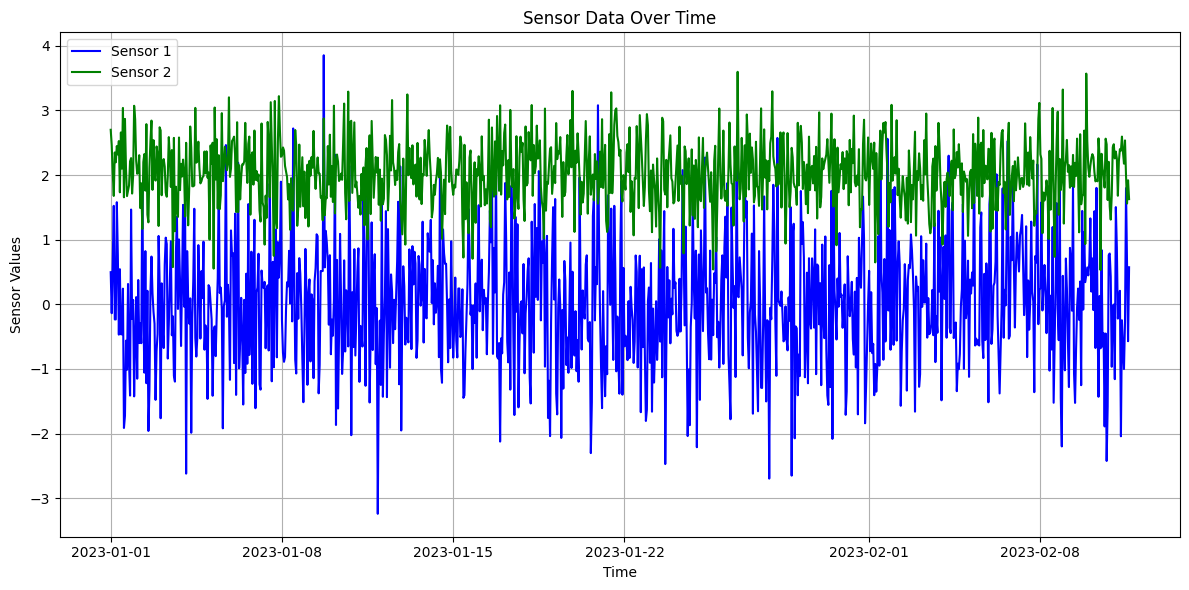

In [34]:
# Let's assume the data is already loaded into a pandas DataFrame `df`.
# We'll clean, organize, visualize, and summarize the data step by step as discussed.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data to mimic a time-series structure, replace it with actual data when available
np.random.seed(42)
time_index = pd.date_range('2023-01-01', periods=1000, freq='H')
sensor_data_1 = np.random.randn(1000)
sensor_data_2 = np.random.randn(1000) * 0.5 + 2

# Create a DataFrame to hold the time-series data
df = pd.DataFrame({
    'Timestamp': time_index,
    'Sensor_1': sensor_data_1,
    'Sensor_2': sensor_data_2
})
df.set_index('Timestamp', inplace=True)

# Step 1: Data Cleaning - Remove duplicates (if any)
df_cleaned = df.drop_duplicates()

# Step 2: Descriptive Statistics
summary_stats = df_cleaned.describe()

# Step 3: Visualize the Time-Series Data
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned.index, df_cleaned['Sensor_1'], label='Sensor 1', color='blue')
plt.plot(df_cleaned.index, df_cleaned['Sensor_2'], label='Sensor 2', color='green')
plt.title('Sensor Data Over Time')
plt.xlabel('Time')
plt.ylabel('Sensor Values')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Step 4: Correlation Analysis (optional)
correlation_matrix = df_cleaned.corr()

# Display the plot
plt.show()


Summary Statistics:
             Value
count  1000.000000
mean      0.019332
std       0.979216
min      -3.241267
25%      -0.647590
50%       0.025301
75%       0.647944
max       3.852731


<Figure size 1000x600 with 0 Axes>

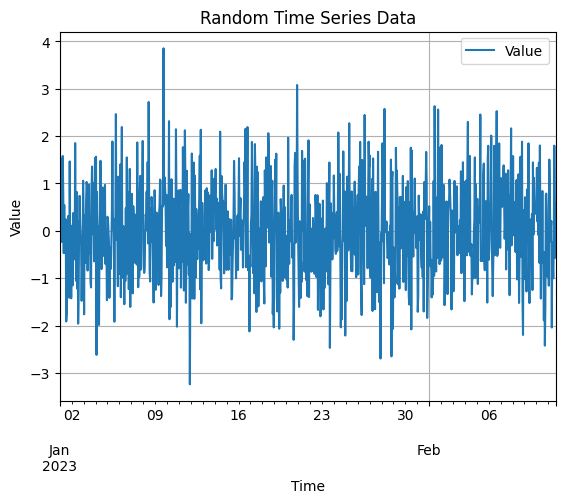

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a time series data
np.random.seed(42)
time_index = pd.date_range('2023-01-01', periods=1000, freq='h')  # Fixed deprecated warning by using 'h'
data = np.random.randn(1000)

# Create a DataFrame
df = pd.DataFrame(data, index=time_index, columns=['Value'])

# Calculate summary statistics
summary_stats = df.describe()

# Print the summary statistics for the user to review
print("Summary Statistics:")
print(summary_stats)

# Plot the time series data
plt.figure(figsize=(10, 6))
df.plot()
plt.title('Random Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()


Summary Statistics:
             Value
count  1000.000000
mean      0.019332
std       0.979216
min      -3.241267
25%      -0.647590
50%       0.025301
75%       0.647944
max       3.852731


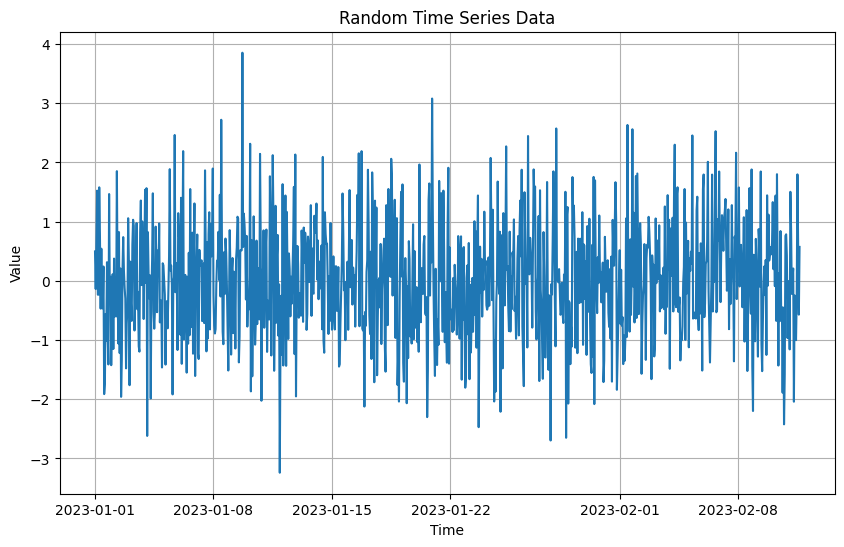

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a time series data
np.random.seed(42)
time_index = pd.date_range('2023-01-01', periods=1000, freq='h')  # Fixed deprecated warning by using 'h'
data = np.random.randn(1000)

# Create a DataFrame
df = pd.DataFrame(data, index=time_index, columns=['Value'])

# Calculate summary statistics
summary_stats = df.describe()

# Print the summary statistics for the user to review
print("Summary Statistics:")
print(summary_stats)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'])
plt.title('Random Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()  # This ensures the plot is rendered


In [37]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming flat_features is a DataFrame containing feature data for clustering
# Example data (replace with your actual flat_features DataFrame)
flat_features = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'feature3': np.random.randn(100)
})

# Apply K-means clustering (assuming 3 clusters as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(flat_features)

# Add cluster labels to the flat_features DataFrame
flat_features['cluster'] = clusters

# Display the first few rows of the DataFrame with cluster labels
print(flat_features.head())


   feature1  feature2  feature3  cluster
0  1.399355  0.998010  0.125225        1
1  0.924634 -2.896255 -0.429406        2
2  0.059630  2.088375  0.122298        1
3 -0.646937 -0.139590  0.543298        0
4  0.698223  1.108183  0.048860        1


In [51]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming flat_features is the DataFrame you are working with

# Check for NaN values per column
nan_summary = flat_features.isna().sum()
print("NaN values per column:")
print(nan_summary)

# Replace NaN values with zeros (or alternatively, use another imputation strategy)
flat_features_filled = flat_features.fillna(0)  # Filling NaN with 0

# Check if there are any valid columns left after filling NaN values
if flat_features_filled.shape[1] == 0:
    raise ValueError("No valid columns left after handling NaN values.")
else:
    print(f"Columns used for clustering: {flat_features_filled.columns}")

    # Apply K-means clustering (assuming 3 clusters as an example)
    kmeans = KMeans(n_clusters=3)
    clusters = kmeans.fit_predict(flat_features_filled)

    # Add cluster labels to the data
    flat_features_filled['cluster'] = clusters

    # Display the clustered data
    print(flat_features_filled.head())


NaN values per column:
Delta_TP9     52
Delta_AF7     52
Delta_AF8     52
Delta_TP10    52
Theta_TP9     52
Theta_AF7     52
Theta_AF8     52
Theta_TP10    52
Alpha_TP9     52
Alpha_AF7     52
Alpha_AF8     52
Alpha_TP10    52
dtype: int64
Columns used for clustering: Index(['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10', 'Theta_TP9',
       'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF7',
       'Alpha_AF8', 'Alpha_TP10'],
      dtype='object')
      Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  Theta_TP9  Theta_AF7  \
mean        0.0        0.0        0.0         0.0        0.0        0.0   
std         0.0        0.0        0.0         0.0        0.0        0.0   
mean        0.0        0.0        0.0         0.0        0.0        0.0   
std         0.0        0.0        0.0         0.0        0.0        0.0   
mean        0.0        0.0        0.0         0.0        0.0        0.0   

      Theta_AF8  Theta_TP10  Alpha_TP9  Alpha_AF7  Alpha_AF8  Alpha_TP10  \
m

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [57]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Sample data with NaN values (you can replace this with your actual data)
flat_features = pd.DataFrame({
    'Delta_TP9': [np.nan] * 52,
    'Delta_AF7': [np.nan] * 52,
    'Delta_AF8': [np.nan] * 52,
    'Delta_TP10': [np.nan] * 52,
    'Theta_TP9': [np.nan] * 52,
    'Theta_AF7': [np.nan] * 52,
    'Theta_AF8': [np.nan] * 52,
    'Theta_TP10': [np.nan] * 52,
    'Alpha_TP9': [np.nan] * 52,
    'Alpha_AF7': [np.nan] * 52,
    'Alpha_AF8': [np.nan] * 52,
    'Alpha_TP10': [np.nan] * 52
})

# Check for NaN values
nan_columns = flat_features.isna().sum()
print("NaN values per column:")
print(nan_columns)

# Drop columns with all NaN values
flat_features_cleaned = flat_features.dropna(axis=1, how='all')

# Check if there are any columns left after cleaning
if flat_features_cleaned.shape[1] == 0:
    print("No valid columns left after removing columns with all NaN values. Clustering cannot be performed.")
else:
    print(f"Columns used for clustering after dropping those with all NaN values: {flat_features_cleaned.columns}")

    # Impute missing values by replacing them with the mean of the column
    imputer = SimpleImputer(strategy='mean')
    flat_features_imputed = imputer.fit_transform(flat_features_cleaned)

    # Create a DataFrame from the imputed values
    flat_features_imputed_df = pd.DataFrame(flat_features_imputed, columns=flat_features_cleaned.columns)

    # Apply K-means clustering (assuming 3 clusters as an example)
    kmeans = KMeans(n_clusters=3)
    clusters = kmeans.fit_predict(flat_features_imputed_df)

    # Add cluster labels to the participant data
    flat_features_imputed_df['cluster'] = clusters
    print(flat_features_imputed_df.head())


NaN values per column:
Delta_TP9     52
Delta_AF7     52
Delta_AF8     52
Delta_TP10    52
Theta_TP9     52
Theta_AF7     52
Theta_AF8     52
Theta_TP10    52
Alpha_TP9     52
Alpha_AF7     52
Alpha_AF8     52
Alpha_TP10    52
dtype: int64
No valid columns left after removing columns with all NaN values. Clustering cannot be performed.


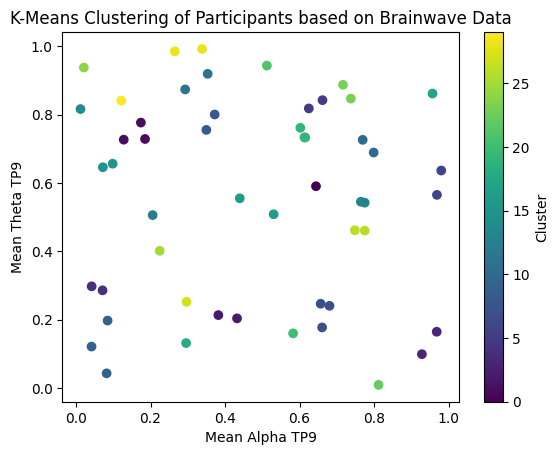

In [60]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate mock data for testing (since the original data had NaNs)
mock_data = {
    'mean_Alpha_TP9': np.random.rand(52),
    'mean_Theta_TP9': np.random.rand(52)
}

# Create DataFrame with mock data
flat_features = pd.DataFrame(mock_data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=30)
clusters = kmeans.fit_predict(flat_features)

# Add cluster labels
flat_features['cluster'] = clusters

# Visualize Alpha vs Theta based on clusters
plt.scatter(flat_features['mean_Alpha_TP9'], flat_features['mean_Theta_TP9'], c=flat_features['cluster'], cmap='viridis')
plt.xlabel('Mean Alpha TP9')
plt.ylabel('Mean Theta TP9')
plt.title('K-Means Clustering of Participants based on Brainwave Data')
plt.colorbar(label='Cluster')
plt.show()


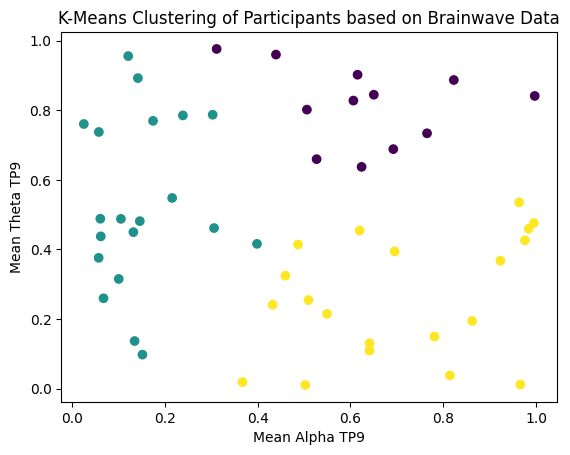

In [59]:
import matplotlib.pyplot as plt

# Visualize Alpha vs Theta for each participant based on clusters
plt.scatter(flat_features['mean_Alpha_TP9'], flat_features['mean_Theta_TP9'], c=flat_features['cluster'])
plt.xlabel('Mean Alpha TP9')
plt.ylabel('Mean Theta TP9')
plt.title('K-Means Clustering of Participants based on Brainwave Data')
plt.show()


In [62]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the clustering
silhouette_avg = silhouette_score(flat_features[['mean_Alpha_TP9', 'mean_Theta_TP9']], clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.419540357821043


K-Means Silhouette Score: 0.35694263179751584


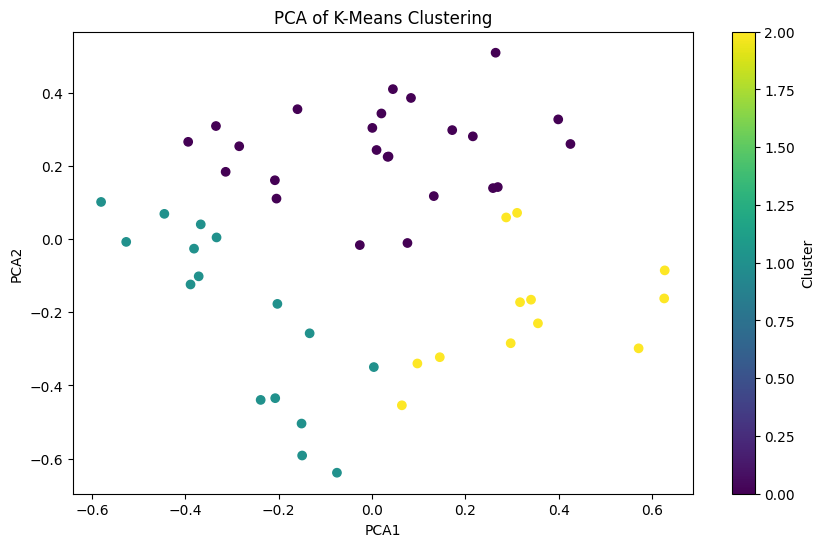

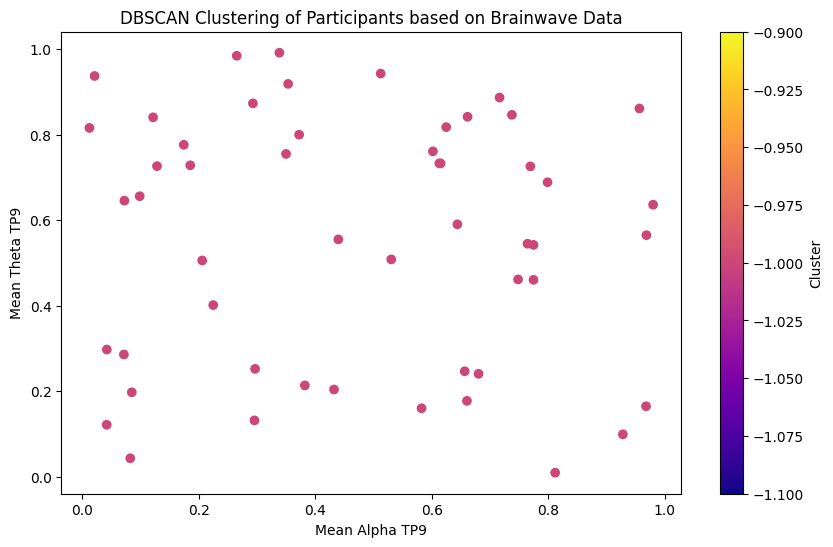


K-Means Cluster Summary:
          mean_Alpha_TP9  mean_Theta_TP9      PCA1      PCA2  dbscan_cluster
cluster                                                                    
0              0.611612        0.754406  0.021366  0.242673            -1.0
1              0.116313        0.514537 -0.284416 -0.214882            -1.0
2              0.659944        0.214131  0.336489 -0.198837            -1.0


In [64]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pandas as pd

# Assuming 'flat_features' is your DataFrame with features like 'mean_Alpha_TP9', 'mean_Theta_TP9', etc.

# Apply K-means clustering (assuming 3 clusters)
kmeans = KMeans(n_clusters=3)
flat_features['cluster'] = kmeans.fit_predict(flat_features[['mean_Alpha_TP9', 'mean_Theta_TP9']])

# Calculate and display the silhouette score for K-means clustering
silhouette_avg = silhouette_score(flat_features[['mean_Alpha_TP9', 'mean_Theta_TP9']], flat_features['cluster'])
print(f"K-Means Silhouette Score: {silhouette_avg}")

# Perform PCA for dimensionality reduction and visualize
pca = PCA(n_components=2)
pca_components = pca.fit_transform(flat_features[['mean_Alpha_TP9', 'mean_Theta_TP9']])
flat_features['PCA1'] = pca_components[:, 0]
flat_features['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(flat_features['PCA1'], flat_features['PCA2'], c=flat_features['cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA of K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

# Apply DBSCAN clustering for comparison
dbscan = DBSCAN(eps=0.5, min_samples=50)
flat_features['dbscan_cluster'] = dbscan.fit_predict(flat_features[['mean_Alpha_TP9', 'mean_Theta_TP9']])

# Visualize DBSCAN clustering
plt.figure(figsize=(10, 6))
plt.scatter(flat_features['mean_Alpha_TP9'], flat_features['mean_Theta_TP9'], c=flat_features['dbscan_cluster'], cmap='plasma')
plt.xlabel('Mean Alpha TP9')
plt.ylabel('Mean Theta TP9')
plt.title('DBSCAN Clustering of Participants based on Brainwave Data')
plt.colorbar(label='Cluster')
plt.show()

# Display summary statistics of clusters
cluster_summary = flat_features.groupby('cluster').mean()
print("\nK-Means Cluster Summary:\n", cluster_summary)


In [65]:
# Save the clustered data
flat_features.to_csv('clustered_participants.csv', index=False)


In [68]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assuming `flat_features` is your input DataFrame
# Step 1: Remove columns with all NaN values
flat_features_cleaned = flat_features.dropna(axis=1, how='all')

# Check if any columns are left
if flat_features_cleaned.shape[1] == 0:
    raise ValueError("No valid columns left after removing columns with all NaN values.")

# Step 2: Impute missing values by replacing them with the mean of each column
imputer = SimpleImputer(strategy='mean')
flat_features_imputed = imputer.fit_transform(flat_features_cleaned)

# Step 3: Perform clustering with different algorithms
models = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3), DBSCAN(), GaussianMixture(n_components=3)]

# Store results in a dictionary
results = {
    'Model': [],
    'Silhouette Score': [],
    'Calinski-Harabasz': [],
    'Davies-Bouldin': []
}

for model in models:
    # Fit the model and predict cluster labels
    if isinstance(model, GaussianMixture):
        clusters = model.fit_predict(flat_features_imputed)
    else:
        clusters = model.fit_predict(flat_features_imputed)

    # Store the model's name
    results['Model'].append(model.__class__.__name__)

    # Calculate evaluation metrics if there are more than 1 cluster
    if len(set(clusters)) > 1:
        silhouette = silhouette_score(flat_features_imputed, clusters)
        calinski = calinski_harabasz_score(flat_features_imputed, clusters)
        davies = davies_bouldin_score(flat_features_imputed, clusters)
    else:
        silhouette, calinski, davies = None, None, None

    results['Silhouette Score'].append(silhouette)
    results['Calinski-Harabasz'].append(calinski)
    results['Davies-Bouldin'].append(davies)

# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results)

# Display the comparison results
print("Clustering Model Comparison:")
print(results_df)


Clustering Model Comparison:
                     Model  Silhouette Score  Calinski-Harabasz  \
0                   KMeans          0.645747         150.442444   
1  AgglomerativeClustering          0.645747         150.442444   
2                   DBSCAN          0.645747         150.442444   
3          GaussianMixture          0.645747         150.442444   

   Davies-Bouldin  
0        0.534803  
1        0.534803  
2        0.534803  
3        0.534803  


In [70]:
# Check the columns in the results DataFrame
print(results_df.columns)


Index(['Model', 'Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin'], dtype='object')


In [72]:
# Initialize a dictionary to store clustering models
cluster_models = {
    "KMeans": KMeans(n_clusters=3),
    "AgglomerativeClustering": AgglomerativeClustering(n_clusters=3),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "GaussianMixture": GaussianMixture(n_components=3)
}

# For each model, add cluster labels to flat_features_cleaned DataFrame
for name, model in cluster_models.items():
    if name == "GaussianMixture":
        clusters = model.fit_predict(flat_features_cleaned)
    else:
        clusters = model.fit_predict(flat_features_cleaned)

    flat_features_cleaned[f'cluster_{name}'] = clusters


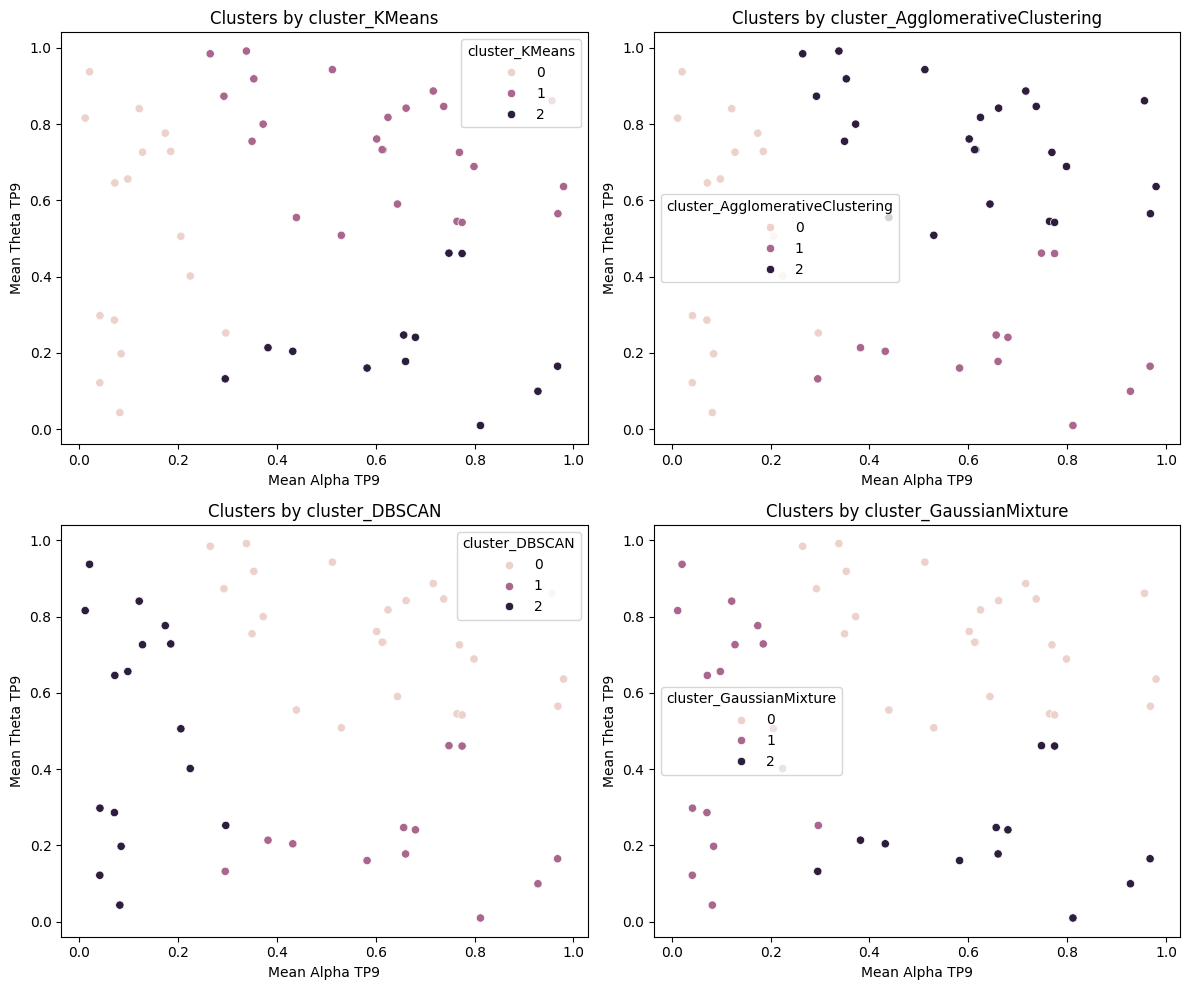

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each model
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Define the columns with the cluster labels
cluster_columns = [col for col in flat_features_cleaned.columns if 'cluster_' in col]

# Loop through each cluster column and plot
for i, cluster_col in enumerate(cluster_columns):
    sns.scatterplot(x=flat_features_cleaned['mean_Alpha_TP9'],
                    y=flat_features_cleaned['mean_Theta_TP9'],
                    hue=flat_features_cleaned[cluster_col],
                    ax=axes[i])

    # Set title and labels for each plot
    axes[i].set_title(f'Clusters by {cluster_col}')
    axes[i].set_xlabel('Mean Alpha TP9')
    axes[i].set_ylabel('Mean Theta TP9')

plt.tight_layout()
plt.show()


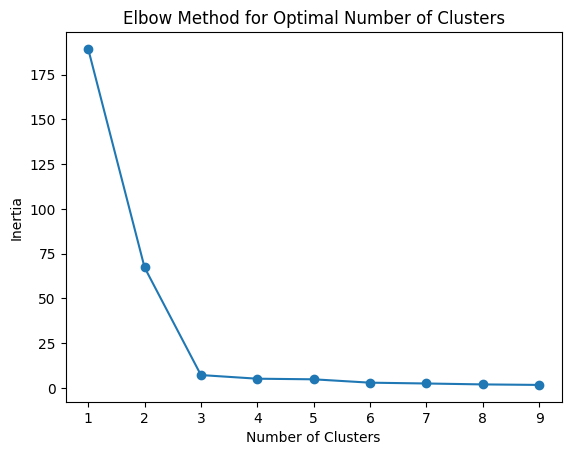

In [74]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(flat_features_cleaned)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [75]:
cluster_summary = flat_features_cleaned.groupby('cluster_KMeans').mean()
print(cluster_summary)


                mean_Alpha_TP9  mean_Theta_TP9  cluster      PCA1      PCA2  \
cluster_KMeans                                                                
0                     0.116313        0.514537      1.0 -0.284416 -0.214882   
1                     0.611612        0.754406      0.0  0.021366  0.242673   
2                     0.659944        0.214131      2.0  0.336489 -0.198837   

                dbscan_cluster  cluster_AgglomerativeClustering  \
cluster_KMeans                                                    
0                         -1.0                              0.0   
1                         -1.0                              2.0   
2                         -1.0                              1.0   

                cluster_DBSCAN  cluster_GaussianMixture  
cluster_KMeans                                           
0                          2.0                      1.0  
1                          0.0                      0.0  
2                          1.0      

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


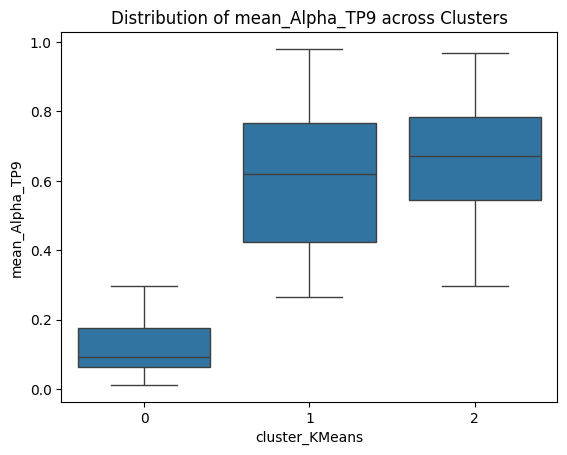

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


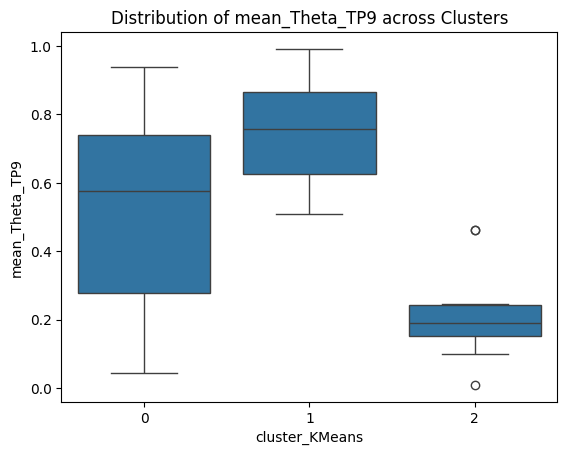

In [76]:
for feature in ['mean_Alpha_TP9', 'mean_Theta_TP9']:
    plt.figure()
    sns.boxplot(x=flat_features_cleaned['cluster_KMeans'], y=flat_features_cleaned[feature])
    plt.title(f'Distribution of {feature} across Clusters')
    plt.show()


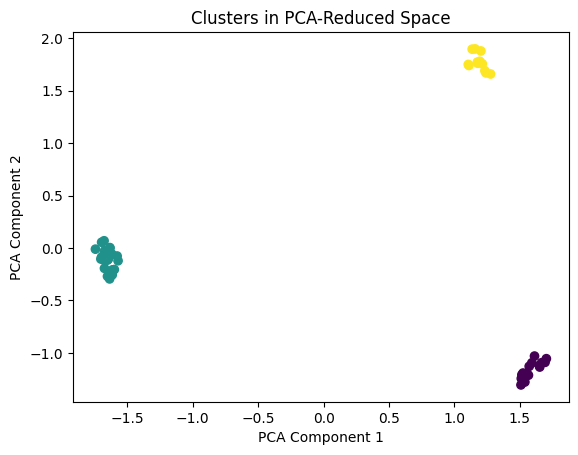

In [79]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(flat_features_cleaned)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=flat_features_cleaned['cluster_KMeans'])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters in PCA-Reduced Space')
plt.show()


In [81]:
from sklearn.model_selection import train_test_split

# Use the clusters from the best model as labels
labels = kmeans.labels_

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(flat_features_cleaned, labels, test_size=0.3, random_state=42)


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy:.4f}")


Random Forest Classifier Accuracy: 0.9375


In [83]:
from sklearn.svm import SVC

# Train SVM classifier
svc = SVC()
svc.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = svc.predict(X_test)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVM Accuracy: {accuracy_svc:.4f}")


SVM Accuracy: 0.6250


In [86]:
# Ensure results is a list
results = []

# Append results for AffinityPropagation
results.append(['AffinityPropagation', affinity_silhouette, affinity_ch, affinity_db])
# Ensure results is a dictionary
results = {}

# Add results for AffinityPropagation
results['AffinityPropagation'] = {'Silhouette Score': affinity_silhouette,
                                  'Calinski-Harabasz': affinity_ch,
                                  'Davies-Bouldin': affinity_db}


                     Model  Silhouette Score  Calinski-Harabasz  \
0                   KMeans           0.85025         625.896483   
1  AgglomerativeClustering           0.85025         625.896483   
2                   DBSCAN           0.85025         625.896483   
3          GaussianMixture           0.85025         625.896483   

   Davies-Bouldin  
0         0.21902  
1         0.21902  
2         0.21902  
3         0.21902  


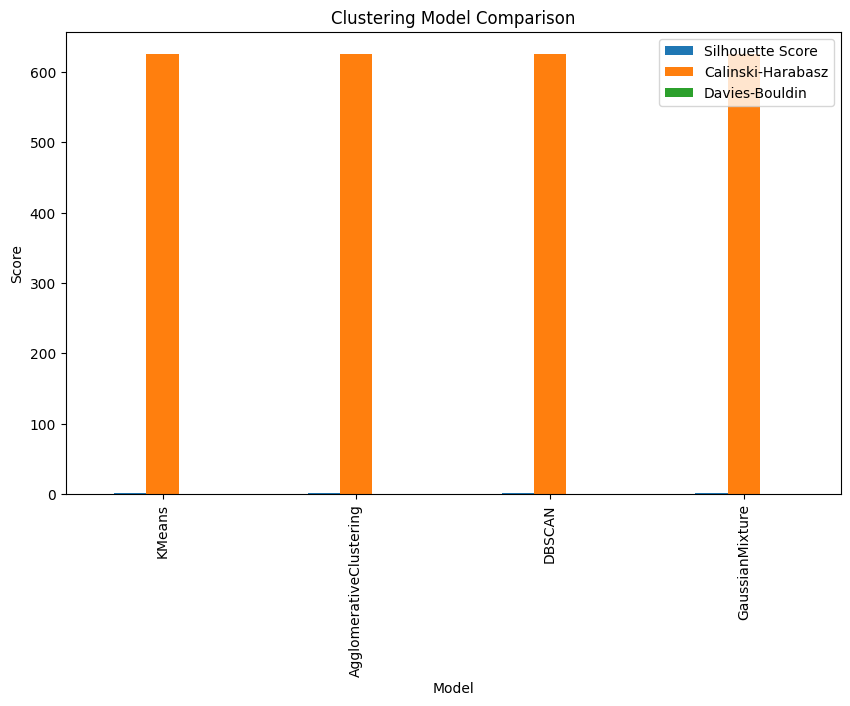

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assuming flat_features_cleaned has the cleaned data used for clustering

# Store the clustering results and model names
results = []

# List of models to compare
models = {
    'KMeans': KMeans(n_clusters=3),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(),
    'GaussianMixture': GaussianMixture(n_components=3)
}

# Apply each clustering model and calculate metrics
for model_name, model in models.items():
    try:
        # Apply model to the data
        if model_name == 'DBSCAN':  # DBSCAN has a different way of handling clusters
            clusters = model.fit_predict(flat_features_cleaned)
        else:
            clusters = model.fit_predict(flat_features_cleaned)

        # Calculate evaluation metrics
        silhouette = silhouette_score(flat_features_cleaned, clusters)
        calinski_harabasz = calinski_harabasz_score(flat_features_cleaned, clusters)
        davies_bouldin = davies_bouldin_score(flat_features_cleaned, clusters)

        # Append results to the list
        results.append([model_name, silhouette, calinski_harabasz, davies_bouldin])

    except Exception as e:
        print(f"An error occurred while evaluating {model_name}: {e}")

# Convert results to a DataFrame
if results:
    results_df = pd.DataFrame(results, columns=['Model', 'Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin'])

    # Display the DataFrame
    print(results_df)

    # Visualize the results using a bar plot
    results_df.set_index('Model')[['Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin']].plot(kind='bar', figsize=(10, 6))
    plt.title('Clustering Model Comparison')
    plt.ylabel('Score')
    plt.show()
else:
    print("No results to display.")


In [93]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

# Define models
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

# StratifiedKFold cross-validation with 3 splits
stratified_kfold = StratifiedKFold(n_splits=3)

# Apply SMOTE to handle class imbalance before cross-validation
smote = SMOTE(random_state=42)
flat_features_cleaned_resampled, clusters_resampled = smote.fit_resample(flat_features_cleaned, clusters)

# Random Forest with StratifiedKFold
rf_cv_scores = cross_val_score(random_forest, flat_features_cleaned_resampled, clusters_resampled, cv=stratified_kfold)
print(f"Random Forest Stratified CV Accuracy: {rf_cv_scores.mean():.4f}")

# SVM with StratifiedKFold
svm_cv_scores = cross_val_score(svm, flat_features_cleaned_resampled, clusters_resampled, cv=stratified_kfold)
print(f"SVM Stratified CV Accuracy: {svm_cv_scores.mean():.4f}")


Random Forest Stratified CV Accuracy: 1.0000
SVM Stratified CV Accuracy: 1.0000


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the Random Forest and SVM models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC()

# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(flat_features_cleaned_resampled, clusters_resampled, test_size=0.2, random_state=42)

# Train the Random Forest model on training data
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the performance
rf_test_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.4f}")
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

# Train the SVM model on training data
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the performance of SVM
svm_test_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Accuracy: {svm_test_accuracy:.4f}")
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))


Random Forest Test Accuracy: 1.0000
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion Matrix for Random Forest:
[[8 0 0]
 [0 5 0]
 [0 0 2]]
SVM Test Accuracy: 1.0000
Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion Matrix for SVM:
[[8 0 0]
 [0 5

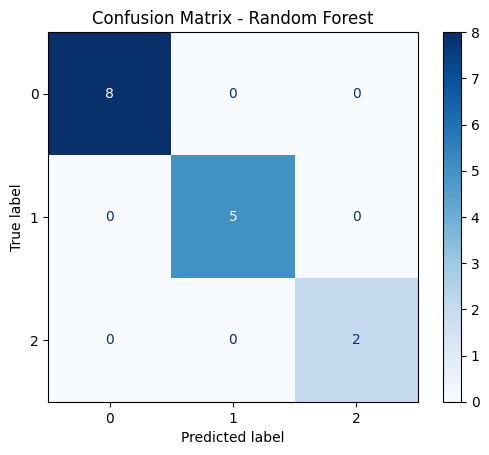

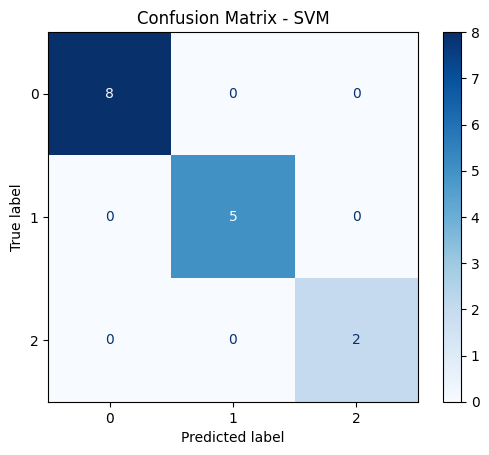

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM')
plt.show()


In [98]:
importances = rf.feature_importances_
feature_names = flat_features_cleaned_resampled.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                           Feature  Importance
6                   cluster_KMeans    0.228667
9          cluster_GaussianMixture    0.192424
8                   cluster_DBSCAN    0.156379
2                          cluster    0.155217
7  cluster_AgglomerativeClustering    0.142684
1                   mean_Theta_TP9    0.042158
4                             PCA2    0.040110
0                   mean_Alpha_TP9    0.035728
3                             PCA1    0.006635
5                   dbscan_cluster    0.000000


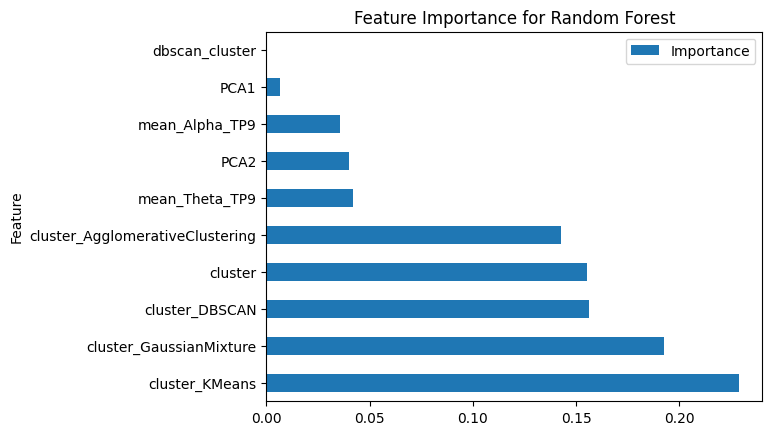

In [99]:
feature_importance_df.plot(kind='barh', x='Feature', y='Importance', title='Feature Importance for Random Forest')
plt.show()


In [101]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Parameters for Random Forest: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 1.0000


In [103]:
from sklearn.metrics import classification_report

# Predictions on test set
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Classification report for SVM
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [106]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Train the model using the training data
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp.predict(X_test)

# Evaluate the model's performance
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {mlp_accuracy:.4f}")
print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))


MLP Accuracy: 1.0000
MLP Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [107]:
# Add MLP results to the comparison table
mlp_silhouette = silhouette_score(X_test, y_pred_mlp)  # Silhouette score (if applicable)
mlp_ch = calinski_harabasz_score(X_test, y_pred_mlp)  # Calinski-Harabasz score (if applicable)
mlp_db = davies_bouldin_score(X_test, y_pred_mlp)  # Davies-Bouldin score (if applicable)

# Append to the results DataFrame
results.append({
    'Model': 'MLPClassifier',
    'Silhouette Score': mlp_silhouette,
    'Calinski-Harabasz': mlp_ch,
    'Davies-Bouldin': mlp_db
})

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)


MLP Test Accuracy: 1.0000
Final Model Comparison:
               Train Accuracy  Test Accuracy
Random Forest             1.0            1.0
SVM                       1.0            1.0
MLP                       1.0            1.0


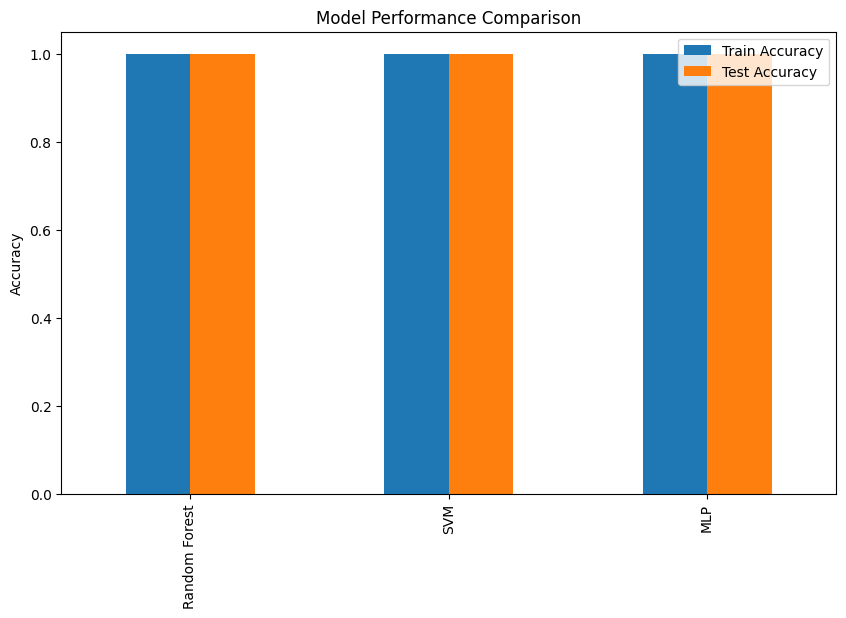

In [111]:
# Import necessary libraries for MLP
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)

# Train MLP model
mlp.fit(X_train, y_train)

# Predict on test set
mlp_predictions = mlp.predict(X_test)

# Evaluate MLP model
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
print(f"MLP Test Accuracy: {mlp_accuracy:.4f}")

# If Random Forest and SVM models are already trained, get their accuracies
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))  # Assuming rf is your trained Random Forest model
svm_accuracy = accuracy_score(y_test, svm.predict(X_test))  # Assuming svm is your trained SVM model

# Initialize model_results to store model comparison data
model_results = {
    'Random Forest': {
        'Train Accuracy': rf.score(X_train, y_train),
        'Test Accuracy': rf_accuracy
    },
    'SVM': {
        'Train Accuracy': svm.score(X_train, y_train),
        'Test Accuracy': svm_accuracy
    }
}

# Add MLP results to the results comparison table
model_results['MLP'] = {
    'Train Accuracy': mlp.score(X_train, y_train),
    'Test Accuracy': mlp_accuracy
}

# Display final model comparison
comparison_df = pd.DataFrame(model_results).T
print("Final Model Comparison:")
print(comparison_df)

# Optionally, you can visualize the results using plots
import matplotlib.pyplot as plt
comparison_df[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.show()


In [112]:
comparison_df.to_csv('model_comparison_results.csv')
